# Stat 5650
## Statistical Learning and Data Mining I
## Homework #1
### Due: Wednesday, January 29.
The purpose of this homework is to get you comfortable using R to carry out basic matrix and
vector calculations.
The turtle data contains measurements (length, width, height) on male and female turtles of the
same species. If you are familiar with SAS but not R, you can check many of the calculations in
SAS but please do the calculations in R.


1. Graphically summarize the distributions of the three variables using boxplots, histograms,
and normal quantile plots. Do the summaries for the combined data and for each gender of
turtle.

In [2]:
turtles <- read.csv("../../Data/turtles.csv")

In [3]:
males <- turtles[turtles$Gender == 'male', 1:3]
females <- turtles[turtles$Gender == 'female', 1:3]

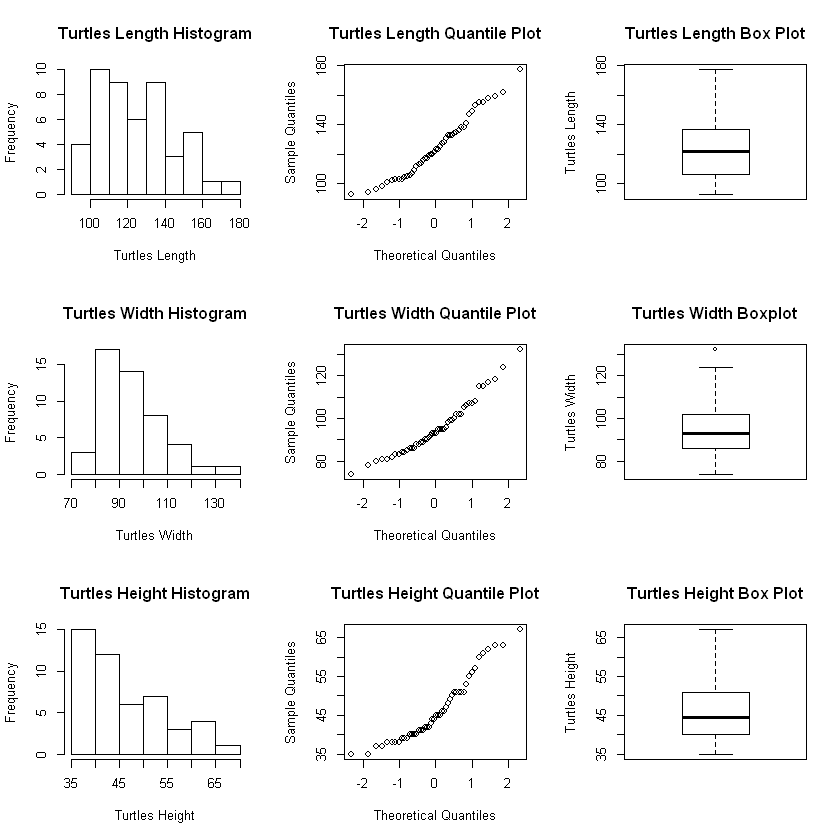

In [4]:
par(mfrow=c(3,3))
hist(turtles$Length,
     main = 'Turtles Length Histogram',
     xlab = 'Turtles Length')
qqnorm(turtles$Length,
       main = 'Turtles Length Quantile Plot')
boxplot(turtles$Length,
        main = 'Turtles Length Box Plot',
        ylab = 'Turtles Length')
hist(turtles$Width,
     main = 'Turtles Width Histogram',
     xlab = 'Turtles Width')
qqnorm(turtles$Width,
       main = 'Turtles Width Quantile Plot')
boxplot(turtles$Width,
        main = 'Turtles Width Boxplot',
        ylab = 'Turtles Width')
hist(turtles$Height,
     main = 'Turtles Height Histogram',
     xlab = 'Turtles Height')
qqnorm(turtles$Height,
       main = 'Turtles Height Quantile Plot')
boxplot(turtles$Height,
        main = 'Turtles Height Box Plot',
        ylab = 'Turtles Height')

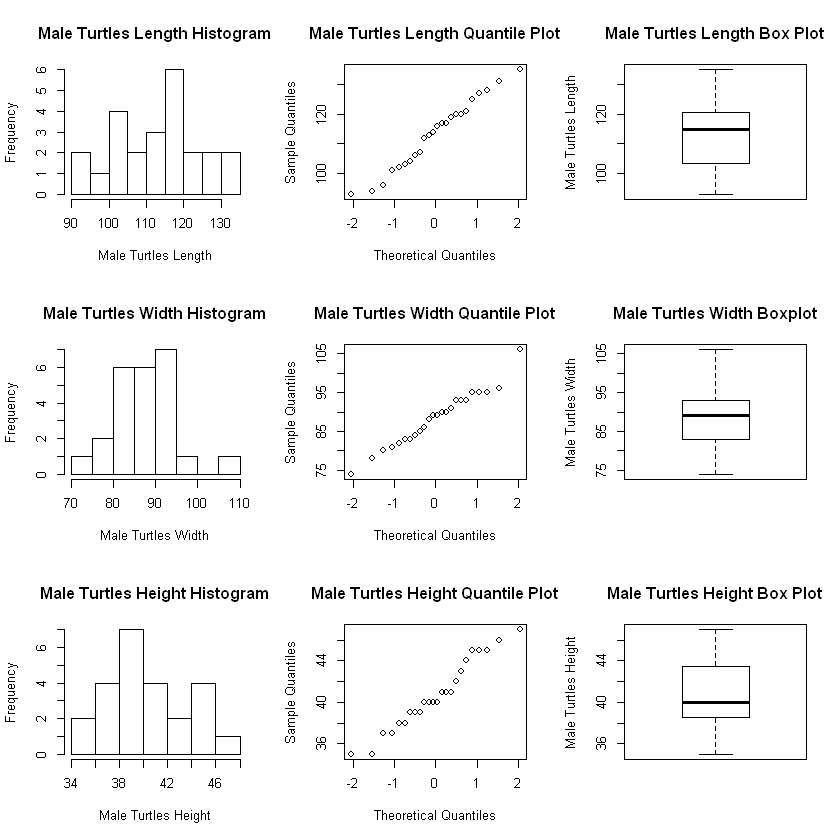

In [5]:
par(mfrow=c(3,3))
hist(males$Length,
     main = 'Male Turtles Length Histogram',
     xlab = 'Male Turtles Length')
qqnorm(males$Length,
       main = 'Male Turtles Length Quantile Plot')
boxplot(males$Length,
        main = 'Male Turtles Length Box Plot',
        ylab = 'Male Turtles Length')
hist(males$Width,
     main = 'Male Turtles Width Histogram',
     xlab = 'Male Turtles Width')
qqnorm(males$Width,
       main = 'Male Turtles Width Quantile Plot')
boxplot(males$Width,
        main = 'Male Turtles Width Boxplot',
        ylab = 'Male Turtles Width')
hist(males$Height,
     main = 'Male Turtles Height Histogram',
     xlab = 'Male Turtles Height')
qqnorm(males$Height,
       main = 'Male Turtles Height Quantile Plot')
boxplot(males$Height,
        main = 'Male Turtles Height Box Plot',
        ylab = 'Male Turtles Height')

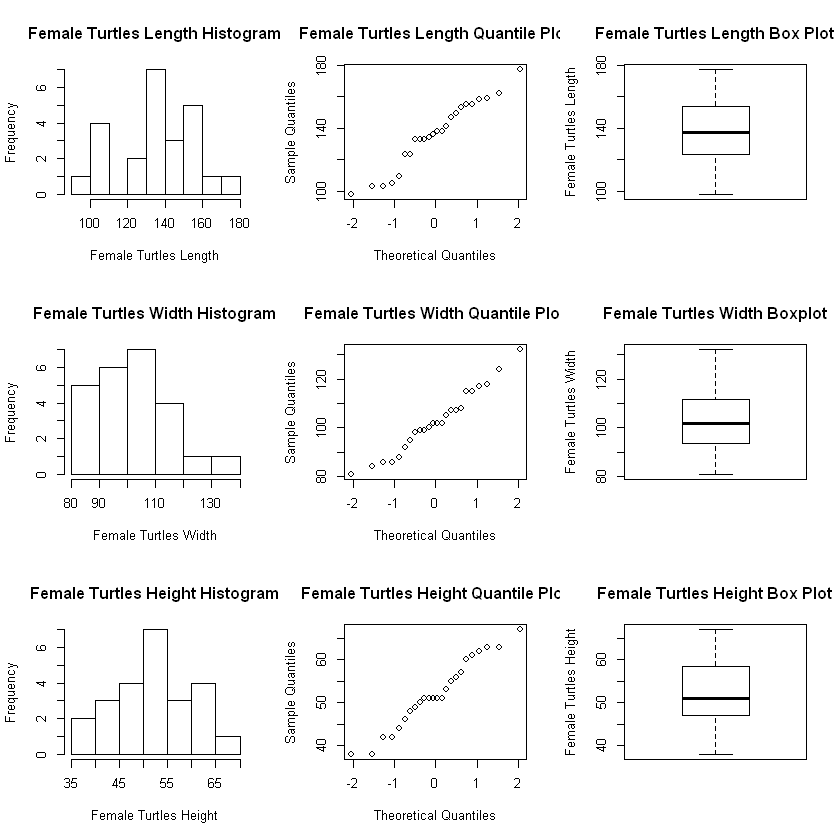

In [6]:
par(mfrow=c(3,3))
hist(females$Length,
     main = 'Female Turtles Length Histogram',
     xlab = 'Female Turtles Length')
qqnorm(females$Length,
       main = 'Female Turtles Length Quantile Plot')
boxplot(females$Length,
        main = 'Female Turtles Length Box Plot',
        ylab = 'Female Turtles Length')
hist(females$Width,
     main = 'Female Turtles Width Histogram',
     xlab = 'Female Turtles Width')
qqnorm(females$Width,
       main = 'Female Turtles Width Quantile Plot')
boxplot(females$Width,
        main = 'Female Turtles Width Boxplot',
        ylab = 'Female Turtles Width')
hist(females$Height,
     main = 'Female Turtles Height Histogram',
     xlab = 'Female Turtles Height')
qqnorm(females$Height,
       main = 'Female Turtles Height Quantile Plot')
boxplot(females$Height,
        main = 'Female Turtles Height Box Plot',
        ylab = 'Female Turtles Height')

2. Compute the covariance matrices and the correlation matrices for the male and female turtles,
and visually compare them. (Later we will determine how to formally compare covariance
matrices and mean vectors for different groups.)

In [7]:
males.cov <- cov(males)
females.cov <- cov(females)
print('Male Covariance Matrix')
males.cov
print('Female Covariance Matrix')
females.cov

[1] "Male Covariance Matrix"


,Length,Width,Height
Length,138.76630,79.14674,37.37500
Width,79.14674,50.04167,21.65399
Height,37.37500,21.65399,11.25906


[1] "Female Covariance Matrix"


,Length,Width,Height
Length,451.5199,270.9746,165.95471
Width,270.9746,171.7319,101.84420
Height,165.9547,101.8442,64.73732


Looking at the covariance matrices for male and female turtles. We can see that they all have an increasing linear relationship. The covariance values for female turtles is much greater than that for male turtles. But generally you will just use covariance to determine whether the variables have a positive linear relationship or a negative linear relationship.

In [8]:
males.cor <- cor(males)
females.cor <- cor(females)
print('Male Correlation Matrix')
males.cor
print('Female Correlation Matrix')
females.cor

[1] "Male Correlation Matrix"


,Length,Width,Height
Length,1.0000000,0.9497846,0.9455580
Width,0.9497846,1.0000000,0.9122648
Height,0.9455580,0.9122648,1.0000000


[1] "Female Correlation Matrix"


,Length,Width,Height
Length,1.0000000,0.9731162,0.9706748
Width,0.9731162,1.0000000,0.9659029
Height,0.9706748,0.9659029,1.0000000


The correlation matrices for females and males show that all of the variables are positively correlated and that they have very strong correlation between them. The correlation values do show greater strength among the female turtles. But the male turtles are still close behind them.

3. For one of the genders, compute the matrix $T = \frac{1}{n-1} (\mathbf{Y}^T \mathbf{Y} - n \mathbf{\bar{y}} \mathbf{\bar{y}}^T)$ and compare it with the covariance matrix you previously obtained.

In [18]:
k <- ncol(males)
n <- nrow(males)
m_males <- as.matrix(males)

#create means for each column
M_mean <- matrix(data=1, nrow=n) %*% cbind(mean(males$Length),mean(males$Width),mean(males$Height))

# creates a difference matrix
D <- m_males - M_mean

# creates the covariance matrix
(n-1)^-1 * (t(D) %*% D)

,Length,Width,Height
Length,138.76630,79.14674,37.37500
Width,79.14674,50.04167,21.65399
Height,37.37500,21.65399,11.25906


In [13]:
1/(n-1)

[1] 0.04347826

[Covariance Matrix Calculation](https://datascienceplus.com/understanding-the-covariance-matrix/)

3. For one of the genders, compute the matrix $T = \frac{1}{n-1} (\mathbf{Y}^T \mathbf{Y} - n \mathbf{\bar{y}} \mathbf{\bar{y}}^T)$ and compare it with thecovariance matrix you previously obtained.

4. For one of the covariance matrices, compute the eigenvalues and eigenvectors of the inverse
of the covariance matrix. What is the relationship between the eigenvalues and eigenvectors
of a covariance matrix and its inverse?

5. Letting 𝒖𝒖1 denote the eigenvector corresponding to the largest eigenvector, 𝜆𝜆1 . Verify
that 𝑺𝑺𝒖𝒖1 = 𝜆𝜆1𝒖𝒖1 and 𝒖𝒖1
𝑇𝑇𝑺𝑺𝒖𝒖1 = 𝜆𝜆1.

6. The length, width, and height are all measured in the same units. Is there any reason we
might prefer to use the correlation matrices over the covariance matrices if we were to carry
out principal components analysis on these data?

7. Compute the eigenvalues and eigenvectors for the covariance and the correlation matrix for
one of the genders of turtle, and compare the eigenvectors. In each case, how many
principal components would you recommend retaining?